# Análisis Exploratorio de Datos (EDA) - Capacidad Acumulada

Este notebook realiza un análisis completo de los datos de capacidad acumulada de energía renovable (Solar, Eólica, PCH).

## Objetivos:
1. Entender la estructura y calidad de los datos
2. Analizar distribuciones y estadísticas descriptivas
3. Identificar correlaciones entre variables
4. Visualizar patrones y tendencias temporales
5. Analizar residuos y normalidad de los datos


In [218]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import normaltest, shapiro, jarque_bera
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Configuración de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print("Librerías importadas correctamente")


Librerías importadas correctamente


## Importación de Funciones Reutilizables

Importamos las funciones del notebook de utilidades para poder reutilizarlas en este análisis.
    

In [253]:
# Importar funciones del notebook de utilidades
# Usamos %run para ejecutar el notebook completo y tener acceso a todas las funciones
%run ../utils/funcions.ipynb

# Verificar que la función está disponible
print("✓ Funciones importadas correctamente")


✓ Funciones importadas correctamente


## 1. Carga y Exploración Inicial de Datos

En esta sección se realiza la carga de datos y se realiza una exploración inicial de los datos para entender la dimencionalidad, y la preparación de los datos en caso de encontrar diferencias, valores nulos, tipos de datos incorrectos o datos faltantes.

In [220]:
# Carga de datos
# El archivo usa punto y coma como separador y coma como decimal, este es el dataset de capacidad acumulada de energía renovable en Colombia original, el cual se encuentra en el repositorio de github del proyecto.
# En esa primera seccion, se carga el dataset original y se realiza una exploración inicial de los datos para entender la dimencionalidad, y la preparación de los datos en caso de encontrar diferencias, valores nulos, tipos de datos incorrectos o datos faltantes.
file_path = 'capacidad_acumulada.csv'


df = load_capacidad_data(file_path)
print(df)

# Mostrar información básica
print("=" * 80)
print("INFORMACIÓN BÁSICA DEL DATASET")
print("=" * 80)
print(f"\nDimensiones del dataset: {df.shape[0]} filas x {df.shape[1]} columnas")
print(f"\nColumnas: {list(df.columns)}")
print(f"\nTipos de datos:\n{df.dtypes}")
print(f"\nPrimeras 10 filas:")
print(df.head(10))
print(f"\nÚltimas 10 filas:")
print(df.tail(10))


       Category   SOLAR  EOLICA   PCH
0    2019-01-06   33.30    0.00  0.70
1    2019-01-10   33.30    0.00  0.70
2    2019-01-16   33.30    0.00  0.70
3    2019-01-17   33.31    0.00  0.70
4    2019-01-19   33.34    0.00  0.70
...         ...     ...     ...   ...
1726 2025-10-23 3069.38   41.00 20.62
1727 2025-11-01 3089.28   41.00 20.62
1728 2025-11-02 3089.28   41.00 20.62
1729 2025-11-03 3089.28   41.00 20.62
1730 2025-11-04 3089.28   41.00 20.62

[1731 rows x 4 columns]
INFORMACIÓN BÁSICA DEL DATASET

Dimensiones del dataset: 1731 filas x 4 columnas

Columnas: ['Category', 'SOLAR', 'EOLICA', 'PCH']

Tipos de datos:
Category    datetime64[ns]
SOLAR              float64
EOLICA             float64
PCH                float64
dtype: object

Primeras 10 filas:
    Category  SOLAR  EOLICA  PCH
0 2019-01-06  33.30    0.00 0.70
1 2019-01-10  33.30    0.00 0.70
2 2019-01-16  33.30    0.00 0.70
3 2019-01-17  33.31    0.00 0.70
4 2019-01-19  33.34    0.00 0.70
5 2019-01-23  33.35    0.00 0.7

In [221]:
#Limpieza de datos
# Convertir las columnas a tipo FLOTANTE (float)
# Convertir la columna DATE a tipo fecha
df['Category'] = pd.to_datetime(df['Category'], errors='coerce')
df['SOLAR'] = df['SOLAR'].astype(str).str.replace(',', '.').astype(float)
df = df.rename(columns={'Category': 'Fecha'})

#rdenar por fecha y configurar índice temporal
df = df.sort_values('Fecha')
df = df.set_index('Fecha')

df = df.asfreq('M')  # 'M' = frecuencia mensual

df.tail(100)


,SOLAR,EOLICA,PCH
Fecha,,,
2019-01-31,NaN,NaN,NaN
2019-02-28,NaN,NaN,NaN
2019-03-31,NaN,NaN,NaN
2019-04-30,42.54,0.00,0.70
2019-05-31,43.60,0.00,0.70
2019-06-30,NaN,NaN,NaN
2019-07-31,NaN,NaN,NaN
2019-08-31,NaN,NaN,NaN
2019-09-30,NaN,NaN,NaN


## 2. Imputación de Valores Faltantes

En esta sección se implementan diferentes métodos para imputar valores faltantes en las columnas SOLAR, EOLICA y PCH.

### Métodos disponibles:
1. **Forward Fill**: Rellena con el último valor conocido
2. **Backward Fill**: Rellena con el siguiente valor conocido
3. **Interpolación Lineal**: Interpolación lineal entre valores conocidos
4. **Interpolación Polinomial**: Interpolación usando polinomios
5. **Interpolación Spline**: Interpolación usando splines
6. **Media**: Rellena con la media de la columna
7. **Mediana**: Rellena con la mediana de la columna
8. **K-Nearest Neighbors (KNN)**: Usa los k vecinos más cercanos para imputar


ANÁLISIS DE VALORES FALTANTES

Valores faltantes por columna:
SOLAR     18
EOLICA    18
PCH       18
dtype: int64

Total de valores faltantes: 54
Porcentaje de valores faltantes: 65.85%


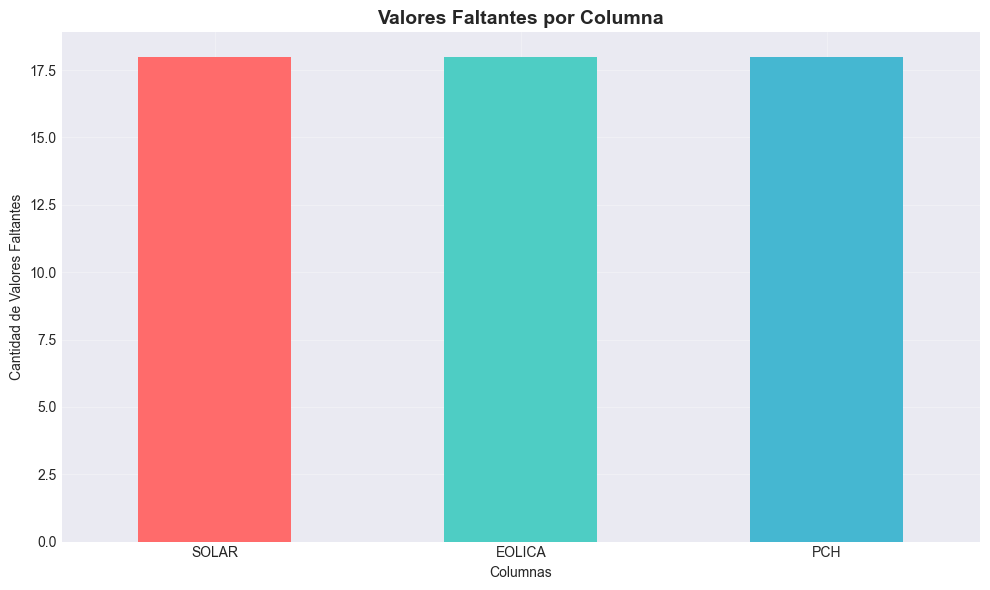

In [222]:
# Verificar valores faltantes antes de imputar
print("=" * 80)
print("ANÁLISIS DE VALORES FALTANTES")
print("=" * 80)
print("\nValores faltantes por columna:")
missing_values = df[['SOLAR', 'EOLICA', 'PCH']].isnull().sum()
print(missing_values)

print(f"\nTotal de valores faltantes: {missing_values.sum()}")
print(f"Porcentaje de valores faltantes: {(missing_values.sum() / len(df) * 100):.2f}%")

# Visualizar valores faltantes
if missing_values.sum() > 0:
    fig, ax = plt.subplots(figsize=(10, 6))
    missing_values.plot(kind='bar', ax=ax, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    ax.set_title('Valores Faltantes por Columna', fontsize=14, fontweight='bold')
    ax.set_ylabel('Cantidad de Valores Faltantes')
    ax.set_xlabel('Columnas')
    ax.grid(True, alpha=0.3)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("\n✓ No hay valores faltantes en las columnas analizadas")


### 2.1. Imputación con Método Seleccionado

Selecciona el método de imputación más adecuado según el tipo de datos y el patrón de valores faltantes.


In [223]:
# Método de imputación recomendado para series temporales: interpolación lineal
# Este método es ideal para datos temporales ya que preserva las tendencias

method = 'linear'  # Otros metodos que podriamos usar 'forward_fill', 'backward_fill', 'linear', 'polynomial', 'spline', 'mean', 'median', 'knn'

# Aplicar imputación
df_imputed = impute_missing_values(
    df.copy(), 
    columns=['SOLAR', 'EOLICA', 'PCH'],
    method=method,
    date_column='Fecha'
)

# Verificar que no queden valores faltantes
print("\n" + "=" * 80)
print("VERIFICACIÓN POST-IMPUTACIÓN")
print("=" * 80)
missing_after = df_imputed[['SOLAR', 'EOLICA', 'PCH']].isnull().sum()
print(f"\nValores faltantes después de imputar: {missing_after.sum()}")
if missing_after.sum() == 0:
    print("✓ Todos los valores faltantes han sido imputados exitosamente")
else:
    print("⚠ Aún quedan valores faltantes. Considera usar otro método o combinar métodos.")
    print(missing_after[missing_after > 0])


Valores faltantes antes de imputar:
  - SOLAR: 18 valores faltantes
  - EOLICA: 18 valores faltantes
  - PCH: 18 valores faltantes

✓ Imputación completada usando método: linear
✓ Valores faltantes después: 0

VERIFICACIÓN POST-IMPUTACIÓN

Valores faltantes después de imputar: 0
✓ Todos los valores faltantes han sido imputados exitosamente


### 2.2. Comparación de Métodos de Imputación

Compara diferentes métodos para elegir el más adecuado según las características de los datos.


In [224]:
# Comparar diferentes métodos de imputación
# Descomentar para ejecutar la comparación completa

# methods_to_compare = ['forward_fill', 'backward_fill', 'linear', 'mean', 'median']
# imputation_results = compare_imputation_methods(
#     df.copy(),
#     columns=['SOLAR', 'EOLICA', 'PCH'],
#     date_column='Category',
#     methods=methods_to_compare
# )

# Ejemplo de uso individual de diferentes métodos:
print("\n" + "=" * 80)
print("EJEMPLOS DE DIFERENTES MÉTODOS DE IMPUTACIÓN")
print("=" * 80)

# Método 1: Forward Fill (útil para datos temporales con tendencia)
print("\n--- Método: Forward Fill ---")
df_ffill = impute_missing_values(df.copy(), method='forward_fill', date_column='Category')

# Método 2: Interpolación Lineal (recomendado para series temporales)
print("\n--- Método: Interpolación Lineal ---")
df_linear = impute_missing_values(df.copy(), method='linear', date_column='Category')

# Método 3: KNN (útil cuando hay correlación entre variables)
print("\n--- Método: K-Nearest Neighbors (KNN) ---")
df_knn = impute_missing_values(df.copy(), method='knn', n_neighbors=5, date_column='Category')



EJEMPLOS DE DIFERENTES MÉTODOS DE IMPUTACIÓN

--- Método: Forward Fill ---
Valores faltantes antes de imputar:
  - SOLAR: 18 valores faltantes
  - EOLICA: 18 valores faltantes
  - PCH: 18 valores faltantes

✓ Imputación completada usando método: forward_fill
✓ Valores faltantes después: 9
⚠ Advertencia: Aún quedan valores faltantes después de la imputación
  - SOLAR: 3 valores faltantes
  - EOLICA: 3 valores faltantes
  - PCH: 3 valores faltantes

--- Método: Interpolación Lineal ---
Valores faltantes antes de imputar:
  - SOLAR: 18 valores faltantes
  - EOLICA: 18 valores faltantes
  - PCH: 18 valores faltantes

✓ Imputación completada usando método: linear
✓ Valores faltantes después: 0

--- Método: K-Nearest Neighbors (KNN) ---
Valores faltantes antes de imputar:
  - SOLAR: 18 valores faltantes
  - EOLICA: 18 valores faltantes
  - PCH: 18 valores faltantes

✓ Imputación completada usando método: knn
✓ Valores faltantes después: 0


### 2.3. Visualización de Resultados de Imputación
    
Visualiza cómo los diferentes métodos afectan los datos imputados.


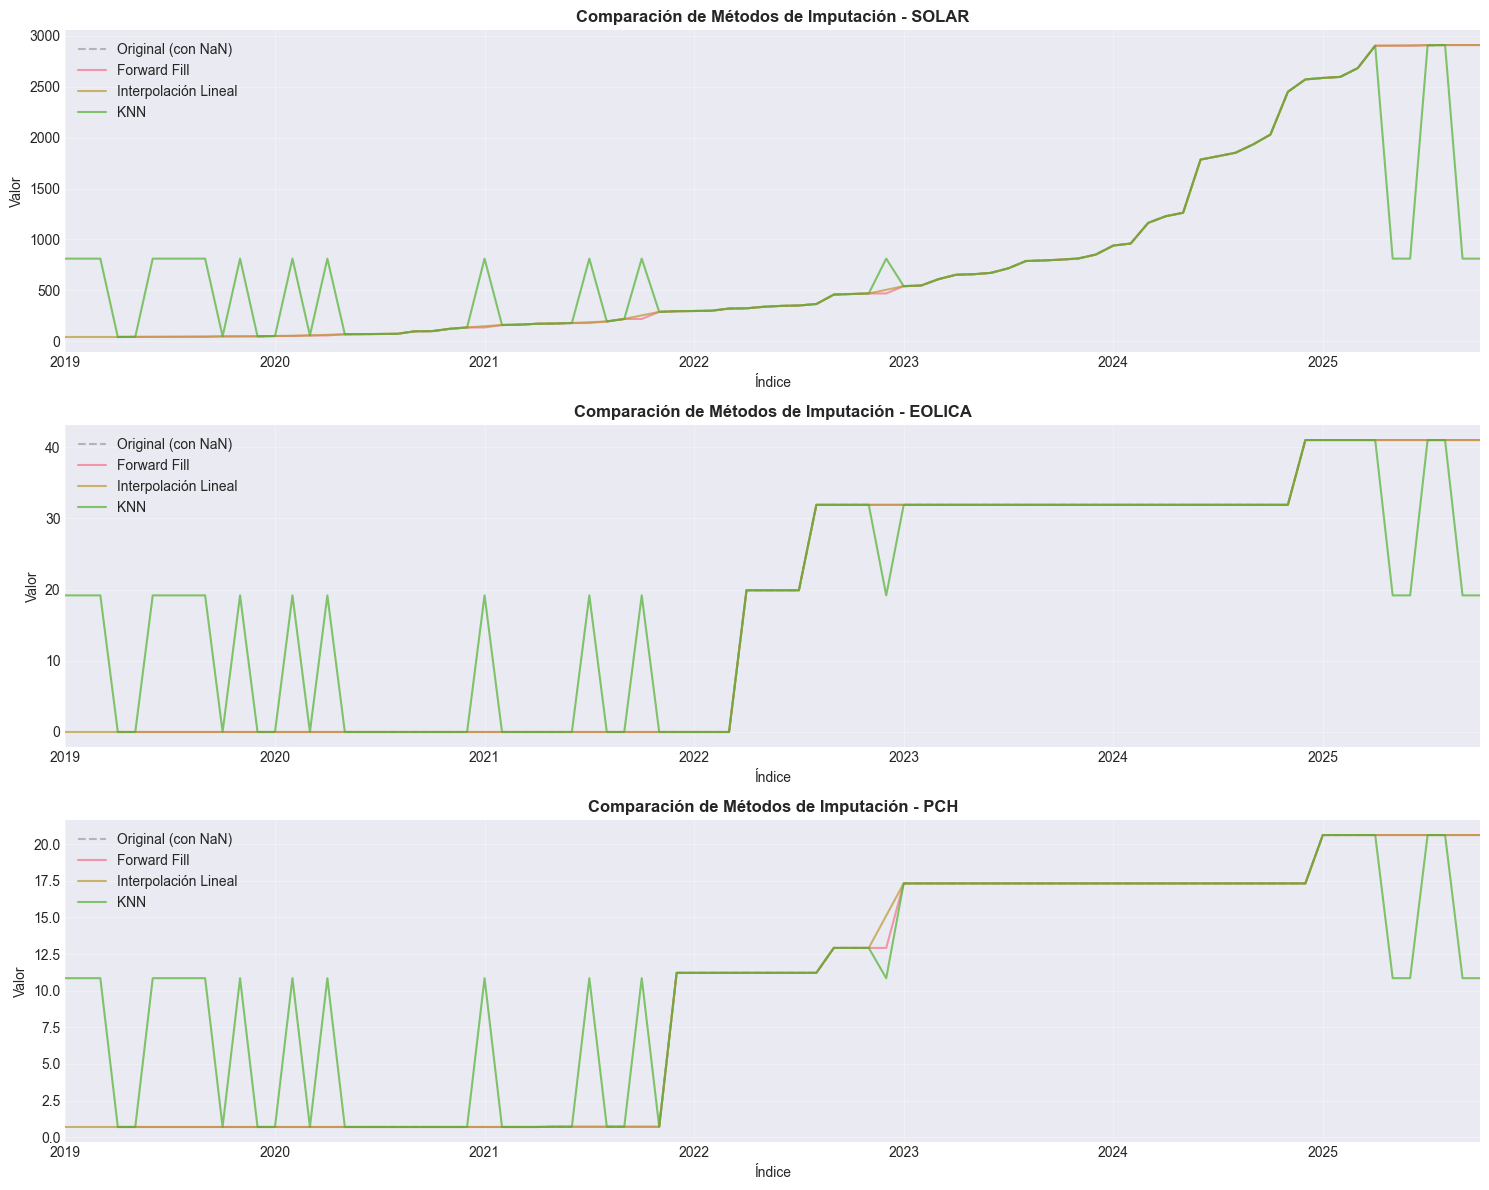

In [225]:
# Visualizar comparación de métodos (si hay valores faltantes)
if missing_values.sum() > 0:
    # Crear gráficos comparativos
    fig, axes = plt.subplots(3, 1, figsize=(15, 12))
    columns_to_plot = ['SOLAR', 'EOLICA', 'PCH']
    
    for idx, col in enumerate(columns_to_plot):
        ax = axes[idx]
        
        # Datos originales (con NaN)
        original_data = df[col].copy()
        original_data.plot(ax=ax, label='Original (con NaN)', alpha=0.5, color='gray', linestyle='--')
        
        # Datos imputados con diferentes métodos
        df_ffill[col].plot(ax=ax, label='Forward Fill', alpha=0.7, linewidth=1.5)
        df_linear[col].plot(ax=ax, label='Interpolación Lineal', alpha=0.7, linewidth=1.5)
        df_knn[col].plot(ax=ax, label='KNN', alpha=0.7, linewidth=1.5)
        
        ax.set_title(f'Comparación de Métodos de Imputación - {col}', fontsize=12, fontweight='bold')
        ax.set_ylabel('Valor')
        ax.set_xlabel('Índice')
        ax.legend(loc='best')
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("No hay valores faltantes para visualizar comparaciones de métodos.")


### 2.4. Aplicar Imputación Final   

Una vez seleccionado el método más adecuado, aplicarlo al dataset completo.


In [226]:
# Aplicar el método seleccionado al dataset completo
# Para series temporales, se recomienda 'linear' o 'forward_fill'

FINAL_IMPUTATION_METHOD = 'linear'  # Cambiar según el análisis previo

df_final = impute_missing_values(
    df.copy(),
    columns=['SOLAR', 'EOLICA', 'PCH'],
    method=FINAL_IMPUTATION_METHOD,
    date_column='Fecha'
)

# Actualizar el DataFrame principal
df = df_final.copy()

# Verificar estadísticas después de imputar
print("\n" + "=" * 80)
print("ESTADÍSTICAS DESPUÉS DE IMPUTACIÓN")
print("=" * 80)
print(df[['SOLAR', 'EOLICA', 'PCH']].describe())

print("\n✓ Imputación completada. El DataFrame 'df' ahora contiene los datos imputados.")


Valores faltantes antes de imputar:
  - SOLAR: 18 valores faltantes
  - EOLICA: 18 valores faltantes
  - PCH: 18 valores faltantes

✓ Imputación completada usando método: linear
✓ Valores faltantes después: 0

ESTADÍSTICAS DESPUÉS DE IMPUTACIÓN
        SOLAR  EOLICA   PCH
count   82.00   82.00 82.00
mean   794.66   17.36  9.77
std    950.29   17.16  8.24
min     42.54    0.00  0.70
25%     98.55    0.00  0.70
50%    343.71   19.90 11.22
75%    955.41   31.90 17.32
max   2909.38   41.00 20.62

✓ Imputación completada. El DataFrame 'df' ahora contiene los datos imputados.


In [227]:
# Ajustar dataset para trabajar con el primer día de cada mes
#df = extract_first_day_per_month(df)
# Renombramos la variable Category a Fecha
df = df.rename(columns={'Category': 'Fecha'})
df.head()

# Preparación de datos: convertir Category a datetime


,SOLAR,EOLICA,PCH
Fecha,,,
2019-01-31,42.54,0.00,0.70
2019-02-28,42.54,0.00,0.70
2019-03-31,42.54,0.00,0.70
2019-04-30,42.54,0.00,0.70
2019-05-31,43.60,0.00,0.70


In [228]:

# Verificar valores nulos y duplicados
print("=" * 80)
print("ANÁLISIS DE CALIDAD DE DATOS")
print("=" * 80)
print(f"\nValores nulos por columna:\n{df.isnull().sum()}")
print(f"\nValores duplicados: {df.duplicated().sum()}")


ANÁLISIS DE CALIDAD DE DATOS

Valores nulos por columna:
SOLAR     0
EOLICA    0
PCH       0
dtype: int64

Valores duplicados: 5


## 2. Estadísticas Descriptivas|


In [229]:
# Estadísticas descriptivas
print("=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 80)
print("\nEstadísticas básicas:")
print(df[['SOLAR', 'EOLICA', 'PCH']].describe())

print("\n\nEstadísticas adicionales:")
stats_df = pd.DataFrame({
    'Variable': ['SOLAR', 'EOLICA', 'PCH'],
    'Media': [df['SOLAR'].mean(), df['EOLICA'].mean(), df['PCH'].mean()],
    'Mediana': [df['SOLAR'].median(), df['EOLICA'].median(), df['PCH'].median()],
    'Desv. Estándar': [df['SOLAR'].std(), df['EOLICA'].std(), df['PCH'].std()],
    'Varianza': [df['SOLAR'].var(), df['EOLICA'].var(), df['PCH'].var()],
    'Coef. Variación': [df['SOLAR'].std()/df['SOLAR'].mean(), 
                        df['EOLICA'].std()/df['EOLICA'].mean() if df['EOLICA'].mean() != 0 else 0,
                        df['PCH'].std()/df['PCH'].mean()],
    'Asimetría': [df['SOLAR'].skew(), df['EOLICA'].skew(), df['PCH'].skew()],
    'Curtosis': [df['SOLAR'].kurtosis(), df['EOLICA'].kurtosis(), df['PCH'].kurtosis()],
    'Mínimo': [df['SOLAR'].min(), df['EOLICA'].min(), df['PCH'].min()],
    'Máximo': [df['SOLAR'].max(), df['EOLICA'].max(), df['PCH'].max()],
    'Rango': [df['SOLAR'].max() - df['SOLAR'].min(), 
              df['EOLICA'].max() - df['EOLICA'].min(),
              df['PCH'].max() - df['PCH'].min()]
})
print(stats_df.round(2))


ESTADÍSTICAS DESCRIPTIVAS

Estadísticas básicas:
        SOLAR  EOLICA   PCH
count   82.00   82.00 82.00
mean   794.66   17.36  9.77
std    950.29   17.16  8.24
min     42.54    0.00  0.70
25%     98.55    0.00  0.70
50%    343.71   19.90 11.22
75%    955.41   31.90 17.32
max   2909.38   41.00 20.62


Estadísticas adicionales:
  Variable  Media  Mediana  Desv. Estándar  Varianza  Coef. Variación  \
0    SOLAR 794.66   343.71          950.29 903057.48             1.20   
1   EOLICA  17.36    19.90           17.16    294.40             0.99   
2      PCH   9.77    11.22            8.24     67.87             0.84   

   Asimetría  Curtosis  Mínimo  Máximo   Rango  
0       1.30      0.25   42.54 2909.38 2866.84  
1       0.07     -1.85    0.00   41.00   41.00  
2      -0.06     -1.80    0.70   20.62   19.92  


## 3. Visualización de Distribuciones de Datos


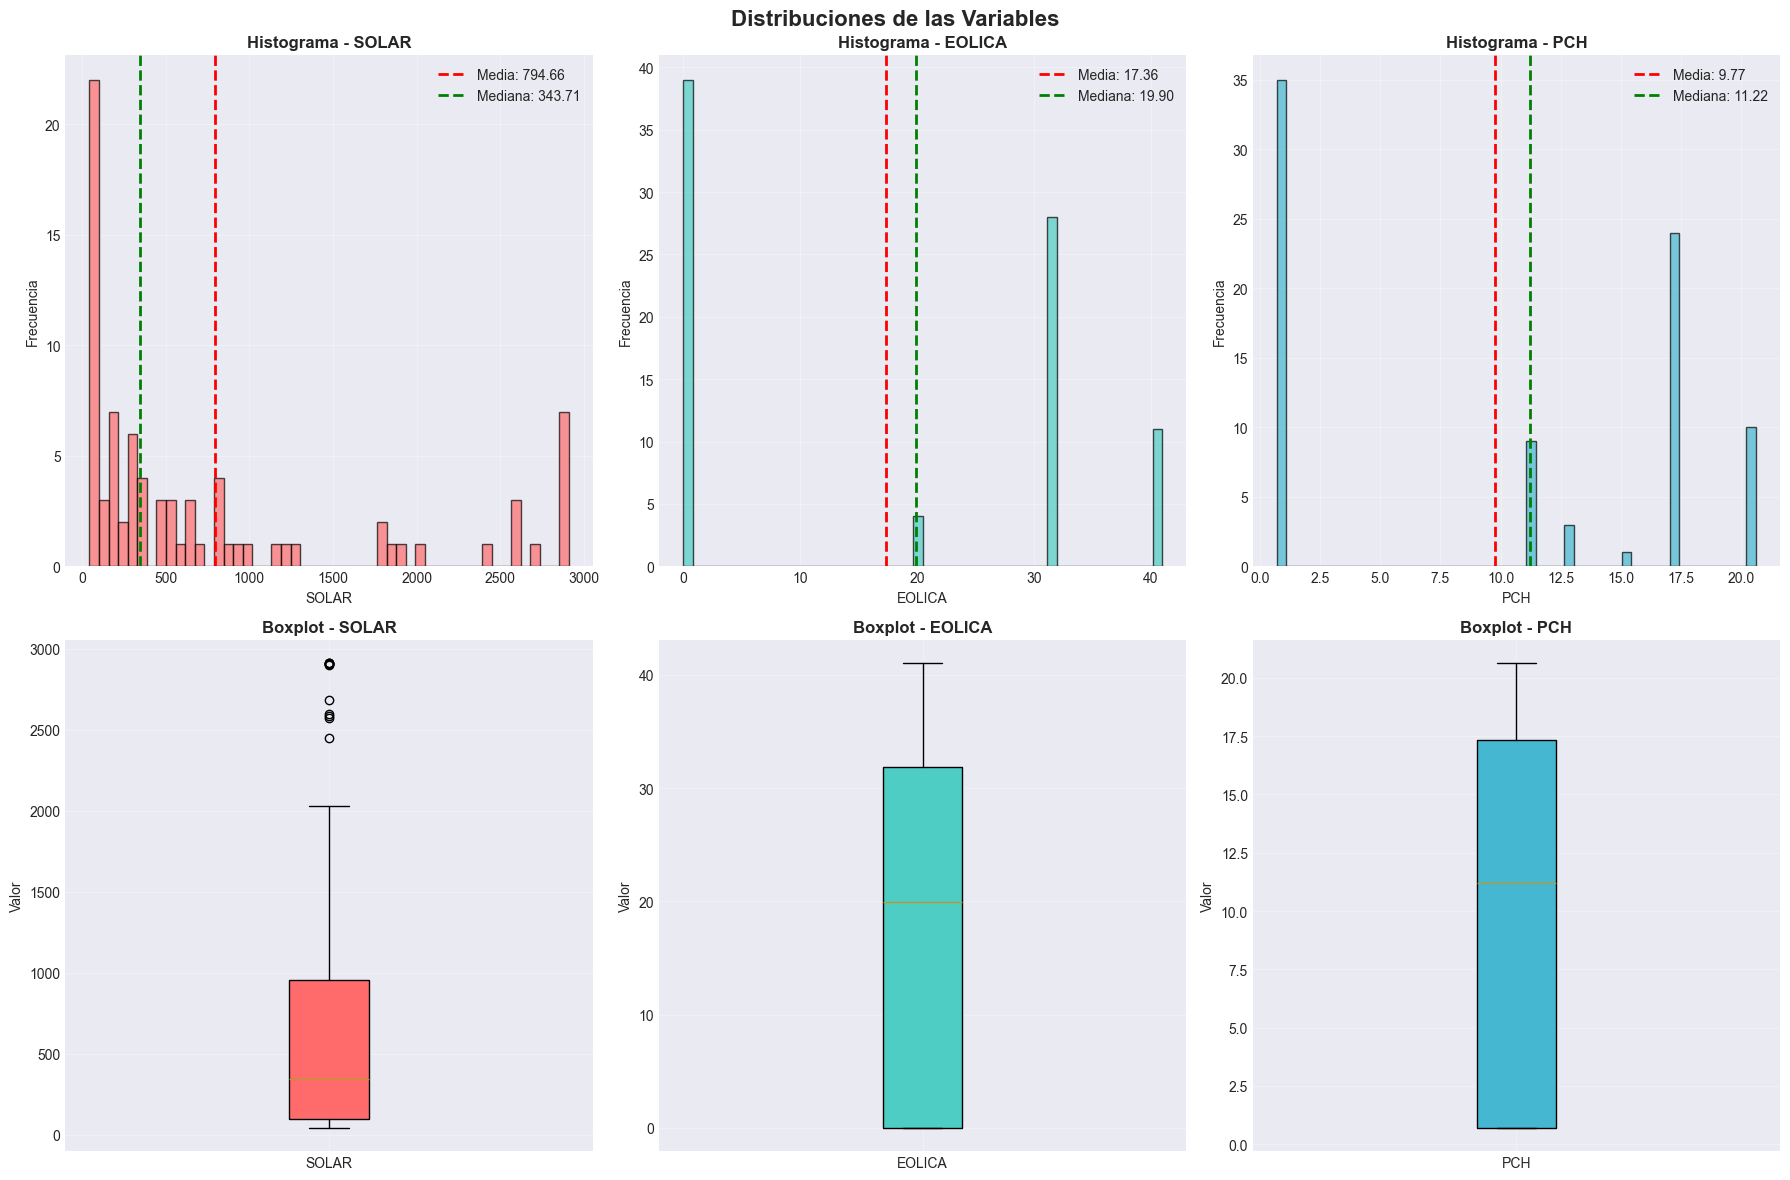

In [230]:
# Gráficas de distribución de los datos
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribuciones de las Variables', fontsize=16, fontweight='bold')

variables = ['SOLAR', 'EOLICA', 'PCH']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for idx, var in enumerate(variables):
    # Histograma
    axes[0, idx].hist(df[var], bins=50, color=colors[idx], alpha=0.7, edgecolor='black')
    axes[0, idx].axvline(df[var].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {df[var].mean():.2f}')
    axes[0, idx].axvline(df[var].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {df[var].median():.2f}')
    axes[0, idx].set_title(f'Histograma - {var}', fontsize=12, fontweight='bold')
    axes[0, idx].set_xlabel(var)
    axes[0, idx].set_ylabel('Frecuencia')
    axes[0, idx].legend()
    axes[0, idx].grid(True, alpha=0.3)
    
    # Boxplot
    bp = axes[1, idx].boxplot(df[var], patch_artist=True, labels=[var])
    bp['boxes'][0].set_facecolor(colors[idx])
    axes[1, idx].set_title(f'Boxplot - {var}', fontsize=12, fontweight='bold')
    axes[1, idx].set_ylabel('Valor')
    axes[1, idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


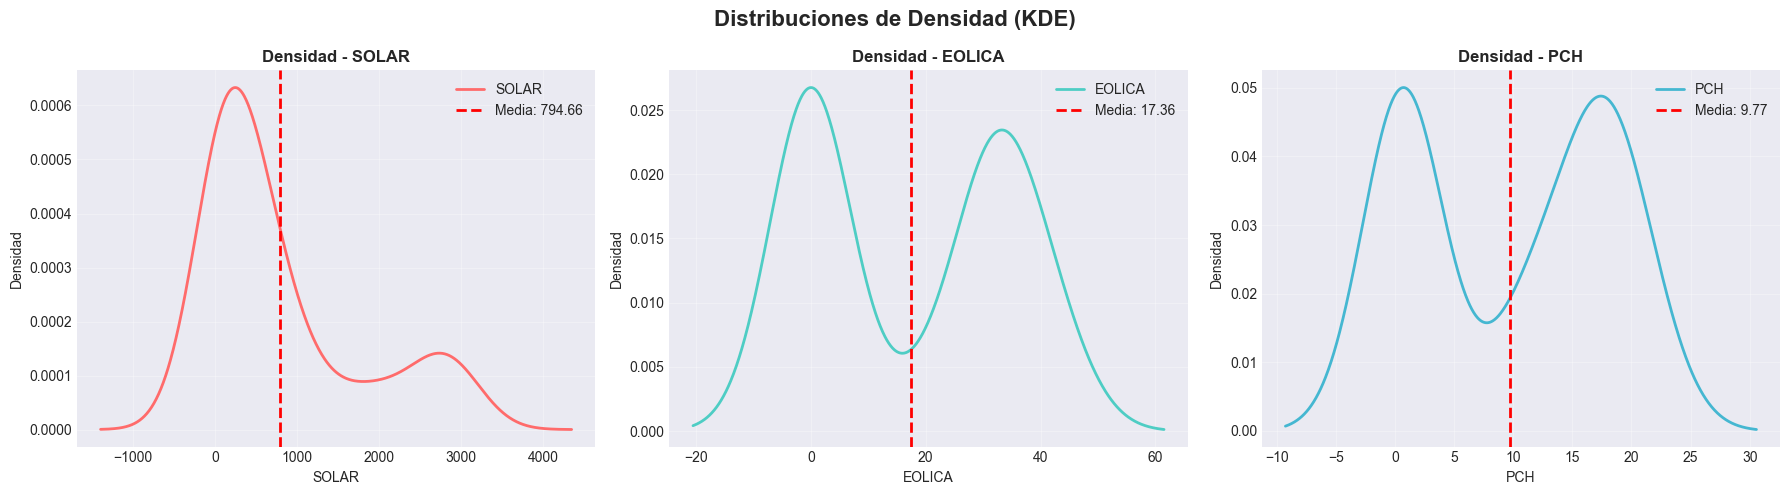

In [231]:
# Gráficas de densidad (KDE)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Distribuciones de Densidad (KDE)', fontsize=16, fontweight='bold')

for idx, var in enumerate(variables):
    df[var].plot(kind='density', ax=axes[idx], color=colors[idx], linewidth=2)
    axes[idx].axvline(df[var].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {df[var].mean():.2f}')
    axes[idx].set_title(f'Densidad - {var}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(var)
    axes[idx].set_ylabel('Densidad')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 4. Análisis de Correlación (Pearson)


In [232]:
# Matriz de correlación de Pearson
correlation_matrix = df[['SOLAR', 'EOLICA', 'PCH']].corr(method='pearson')

print("=" * 80)
print("MATRIZ DE CORRELACIÓN DE PEARSON")
print("=" * 80)
print("\nMatriz de correlación:")
print(correlation_matrix.round(4))

# Análisis detallado de correlaciones
print("\n\nCorrelaciones entre variables:")
print(f"SOLAR vs EOLICA: {correlation_matrix.loc['SOLAR', 'EOLICA']:.4f}")
print(f"SOLAR vs PCH: {correlation_matrix.loc['SOLAR', 'PCH']:.4f}")
print(f"EOLICA vs PCH: {correlation_matrix.loc['EOLICA', 'PCH']:.4f}")

# Interpretación de correlaciones
def interpret_correlation(r):
    """Interpreta el coeficiente de correlación"""
    abs_r = abs(r)
    if abs_r < 0.1:
        return "Despreciable"
    elif abs_r < 0.3:
        return "Débil"
    elif abs_r < 0.5:
        return "Moderada"
    elif abs_r < 0.7:
        return "Fuerte"
    else:
        return "Muy fuerte"

print("\n\nInterpretación de correlaciones:")
print(f"SOLAR vs EOLICA: {interpret_correlation(correlation_matrix.loc['SOLAR', 'EOLICA'])}")
print(f"SOLAR vs PCH: {interpret_correlation(correlation_matrix.loc['SOLAR', 'PCH'])}")
print(f"EOLICA vs PCH: {interpret_correlation(correlation_matrix.loc['EOLICA', 'PCH'])}")


MATRIZ DE CORRELACIÓN DE PEARSON

Matriz de correlación:
        SOLAR  EOLICA  PCH
SOLAR    1.00    0.80 0.79
EOLICA   0.80    1.00 0.95
PCH      0.79    0.95 1.00


Correlaciones entre variables:
SOLAR vs EOLICA: 0.7992
SOLAR vs PCH: 0.7866
EOLICA vs PCH: 0.9542


Interpretación de correlaciones:
SOLAR vs EOLICA: Muy fuerte
SOLAR vs PCH: Muy fuerte
EOLICA vs PCH: Muy fuerte


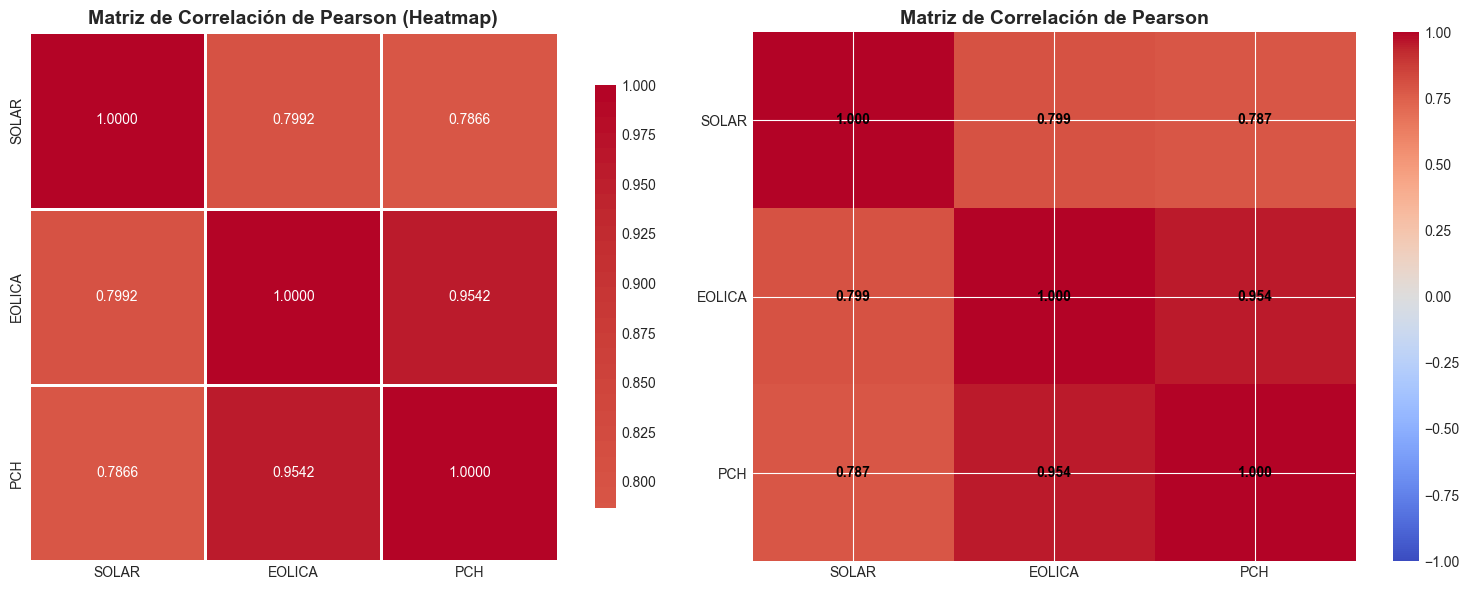

In [233]:
# Visualización de la matriz de correlación
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap de correlación
sns.heatmap(correlation_matrix, annot=True, fmt='.4f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=axes[0])
axes[0].set_title('Matriz de Correlación de Pearson (Heatmap)', fontsize=14, fontweight='bold')

# Matriz de correlación con valores
im = axes[1].imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
axes[1].set_xticks(range(len(correlation_matrix.columns)))
axes[1].set_yticks(range(len(correlation_matrix.columns)))
axes[1].set_xticklabels(correlation_matrix.columns)
axes[1].set_yticklabels(correlation_matrix.columns)
axes[1].set_title('Matriz de Correlación de Pearson', fontsize=14, fontweight='bold')

# Agregar valores de correlación
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = axes[1].text(j, i, f'{correlation_matrix.iloc[i, j]:.3f}',
                           ha="center", va="center", color="black", fontweight='bold')

plt.colorbar(im, ax=axes[1])
plt.tight_layout()
plt.show()


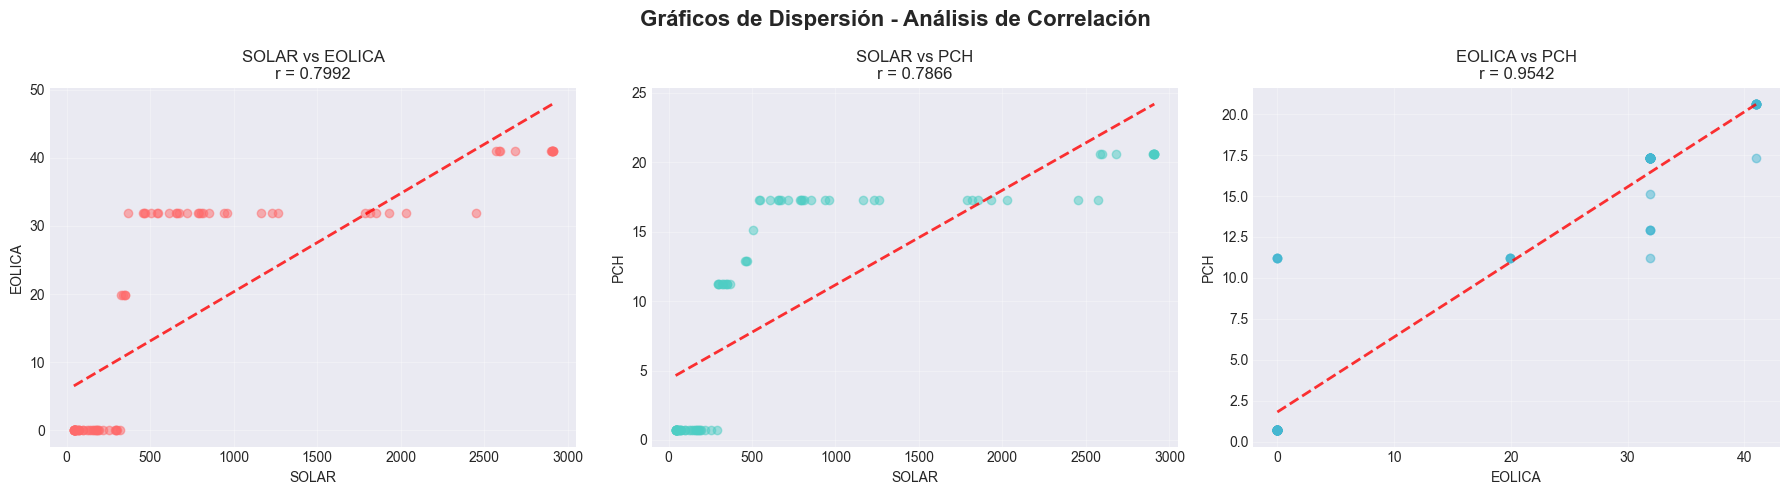

In [234]:
# Gráficos de dispersión (Scatter plots) para visualizar correlaciones
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Gráficos de Dispersión - Análisis de Correlación', fontsize=16, fontweight='bold')

# SOLAR vs EOLICA
axes[0].scatter(df['SOLAR'], df['EOLICA'], alpha=0.5, color='#FF6B6B')
axes[0].set_xlabel('SOLAR')
axes[0].set_ylabel('EOLICA')
axes[0].set_title(f'SOLAR vs EOLICA\nr = {correlation_matrix.loc["SOLAR", "EOLICA"]:.4f}')
axes[0].grid(True, alpha=0.3)
# Línea de tendencia
z = np.polyfit(df['SOLAR'], df['EOLICA'], 1)
p = np.poly1d(z)
axes[0].plot(df['SOLAR'], p(df['SOLAR']), "r--", alpha=0.8, linewidth=2)

# SOLAR vs PCH
axes[1].scatter(df['SOLAR'], df['PCH'], alpha=0.5, color='#4ECDC4')
axes[1].set_xlabel('SOLAR')
axes[1].set_ylabel('PCH')
axes[1].set_title(f'SOLAR vs PCH\nr = {correlation_matrix.loc["SOLAR", "PCH"]:.4f}')
axes[1].grid(True, alpha=0.3)
# Línea de tendencia
z = np.polyfit(df['SOLAR'], df['PCH'], 1)
p = np.poly1d(z)
axes[1].plot(df['SOLAR'], p(df['SOLAR']), "r--", alpha=0.8, linewidth=2)

# EOLICA vs PCH
axes[2].scatter(df['EOLICA'], df['PCH'], alpha=0.5, color='#45B7D1')
axes[2].set_xlabel('EOLICA')
axes[2].set_ylabel('PCH')
axes[2].set_title(f'EOLICA vs PCH\nr = {correlation_matrix.loc["EOLICA", "PCH"]:.4f}')
axes[2].grid(True, alpha=0.3)
# Línea de tendencia
z = np.polyfit(df['EOLICA'], df['PCH'], 1)
p = np.poly1d(z)
axes[2].plot(df['EOLICA'], p(df['EOLICA']), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()


## 5. Análisis Temporal de las Series


In [235]:
df.head()

,SOLAR,EOLICA,PCH
Fecha,,,
2019-01-31,42.54,0.00,0.70
2019-02-28,42.54,0.00,0.70
2019-03-31,42.54,0.00,0.70
2019-04-30,42.54,0.00,0.70
2019-05-31,43.60,0.00,0.70


Estructura del DataFrame:
Columnas: ['SOLAR', 'EOLICA', 'PCH']
Índice: Fecha

Primeras filas:
            SOLAR  EOLICA  PCH
Fecha                         
2019-01-31  42.54    0.00 0.70
2019-02-28  42.54    0.00 0.70
2019-03-31  42.54    0.00 0.70
2019-04-30  42.54    0.00 0.70
2019-05-31  43.60    0.00 0.70


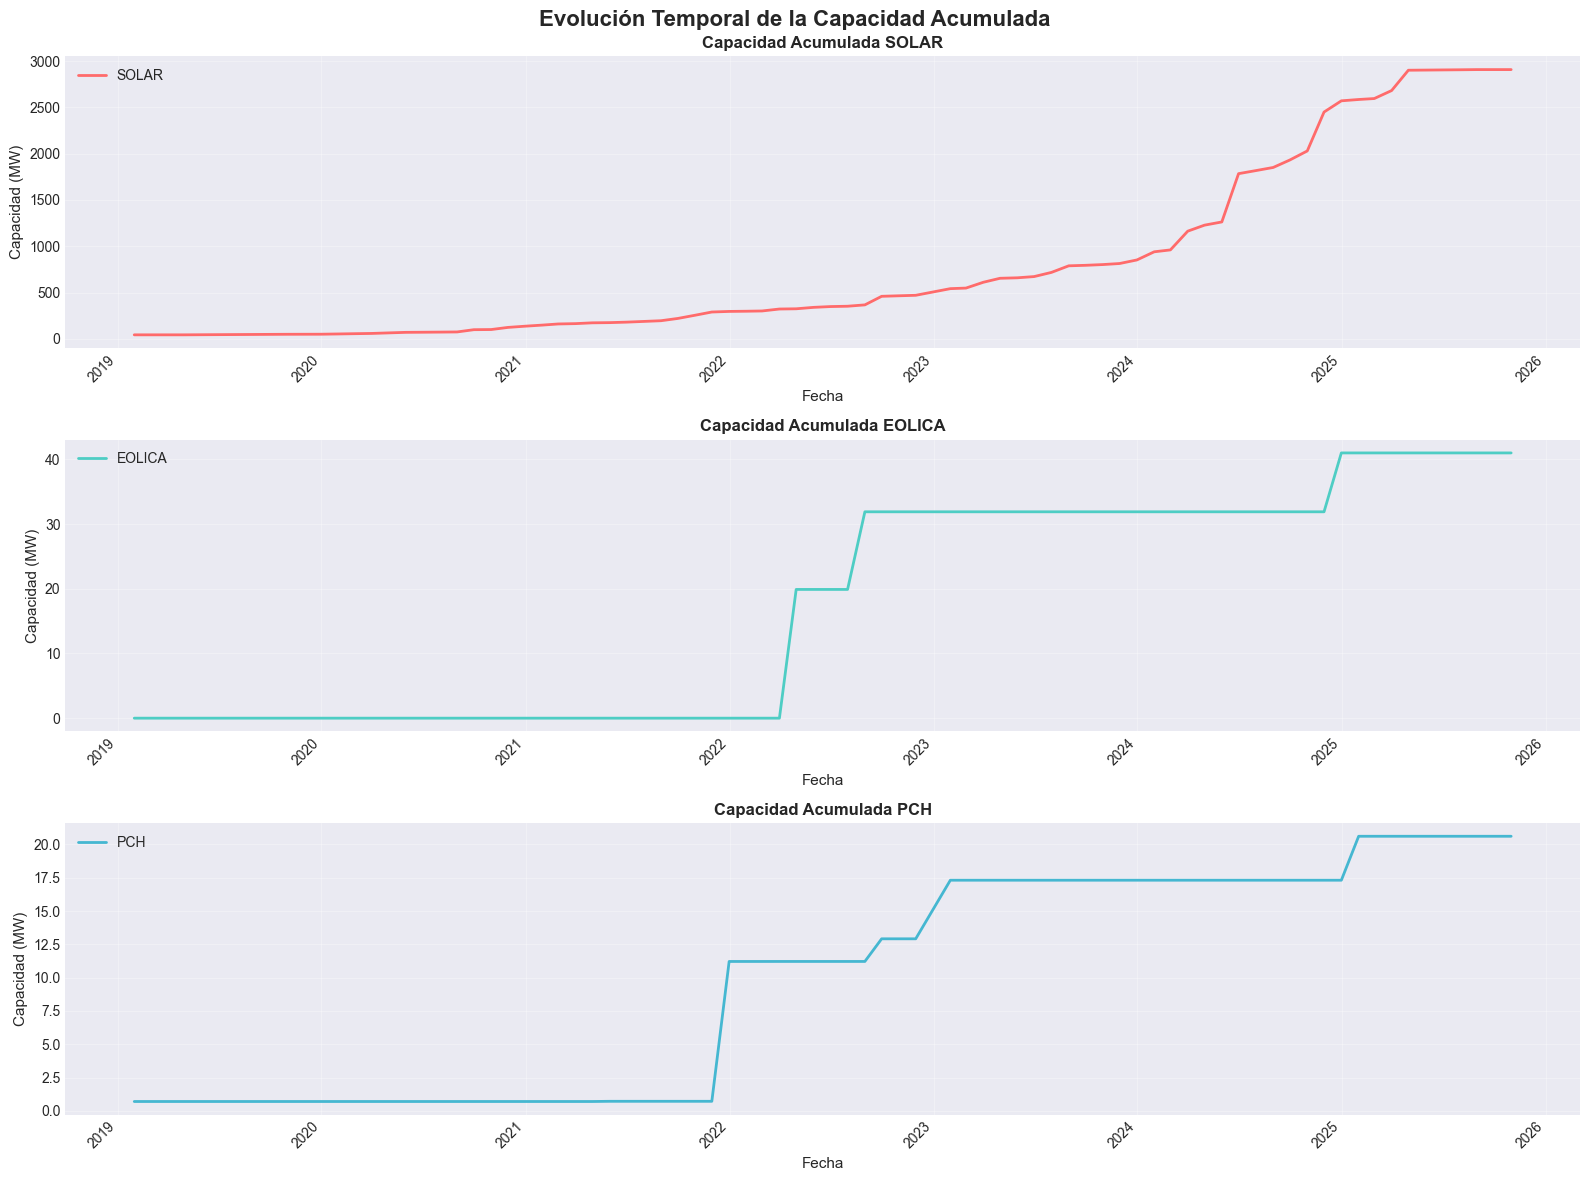

In [239]:
# Visualización de series temporales
print("Estructura del DataFrame:")
print(f"Columnas: {list(df.columns)}")
print(f"Índice: {df.index.name if df.index.name else 'RangeIndex'}")
print(f"\nPrimeras filas:")
print(df.head())

# Determinar la columna de fecha (puede ser 'Fecha', 'Category', o el índice)
if 'Fecha' in df.columns:
    date_col = df['Fecha']
elif 'Category' in df.columns:
    date_col = df['Category']
elif isinstance(df.index, pd.DatetimeIndex):
    date_col = df.index
else:
    # Si no hay columna de fecha, usar el índice numérico
    date_col = df.index
    print("⚠ Advertencia: No se encontró columna de fecha, usando índice numérico")

fig, axes = plt.subplots(3, 1, figsize=(16, 12))
fig.suptitle('Evolución Temporal de la Capacidad Acumulada', fontsize=16, fontweight='bold')

# SOLAR
axes[0].plot(date_col, df['SOLAR'], color='#FF6B6B', linewidth=2, label='SOLAR')
axes[0].set_title('Capacidad Acumulada SOLAR', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Fecha', fontsize=11)
axes[0].set_ylabel('Capacidad (MW)', fontsize=11)
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)
if isinstance(date_col, pd.DatetimeIndex) or pd.api.types.is_datetime64_any_dtype(date_col):
    plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45, ha='right')

# EOLICA
axes[1].plot(date_col, df['EOLICA'], color='#4ECDC4', linewidth=2, label='EOLICA')
axes[1].set_title('Capacidad Acumulada EOLICA', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Fecha', fontsize=11)
axes[1].set_ylabel('Capacidad (MW)', fontsize=11)
axes[1].legend(loc='best')
axes[1].grid(True, alpha=0.3)
if isinstance(date_col, pd.DatetimeIndex) or pd.api.types.is_datetime64_any_dtype(date_col):
    plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45, ha='right')

# PCH
axes[2].plot(date_col, df['PCH'], color='#45B7D1', linewidth=2, label='PCH')
axes[2].set_title('Capacidad Acumulada PCH', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Fecha', fontsize=11)
axes[2].set_ylabel('Capacidad (MW)', fontsize=11)
axes[2].legend(loc='best')
axes[2].grid(True, alpha=0.3)
if isinstance(date_col, pd.DatetimeIndex) or pd.api.types.is_datetime64_any_dtype(date_col):
    plt.setp(axes[2].xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


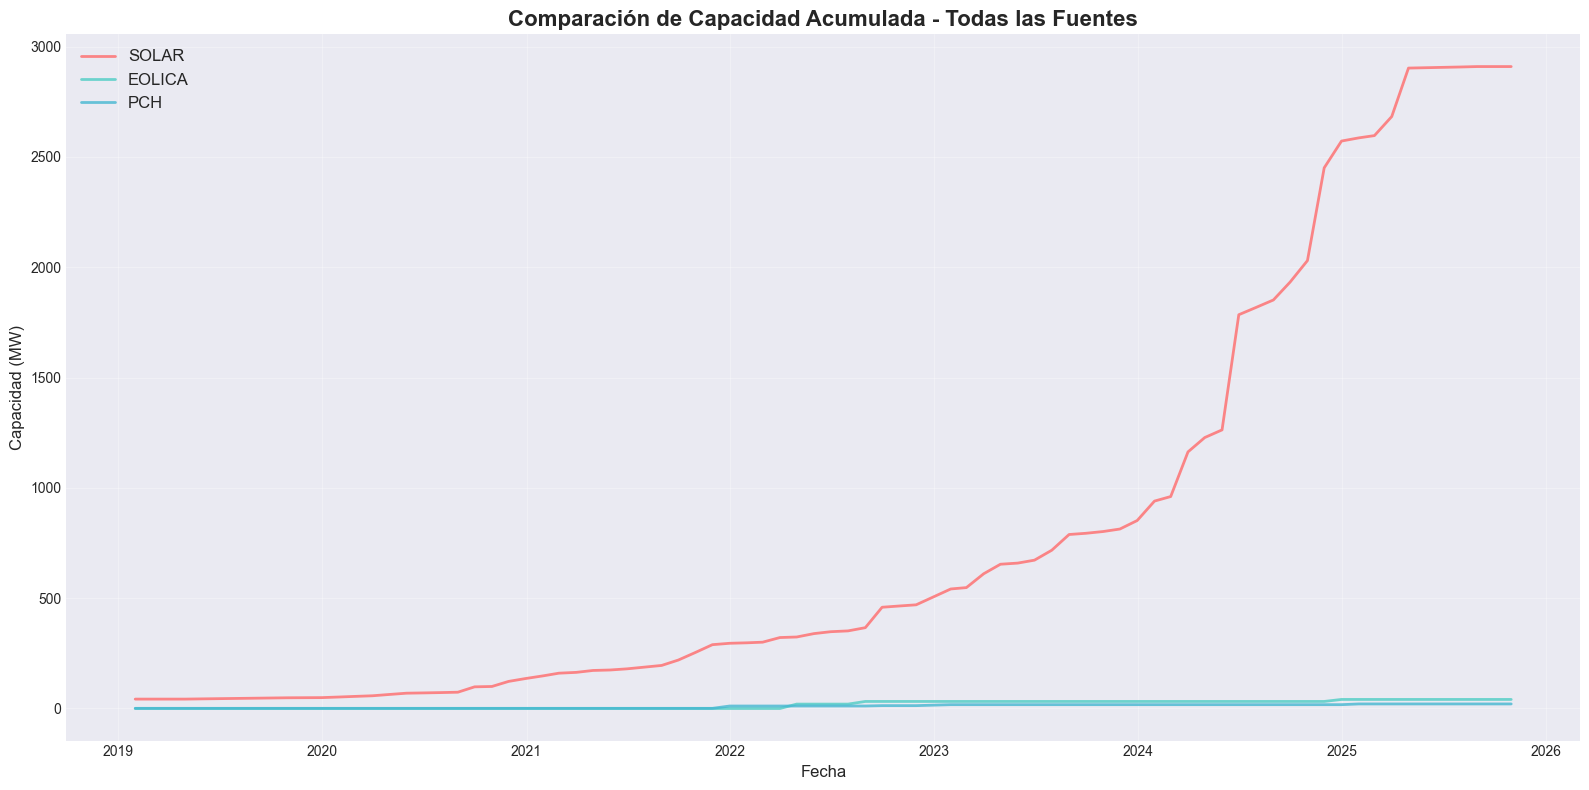

In [241]:
# Comparación de todas las series en un solo gráfico
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(date_col, df['SOLAR'], color='#FF6B6B', linewidth=2, label='SOLAR', alpha=0.8)
ax.plot(date_col, df['EOLICA'], color='#4ECDC4', linewidth=2, label='EOLICA', alpha=0.8)
ax.plot(date_col, df['PCH'], color='#45B7D1', linewidth=2, label='PCH', alpha=0.8)
ax.set_title('Comparación de Capacidad Acumulada - Todas las Fuentes', fontsize=16, fontweight='bold')
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Capacidad (MW)', fontsize=12)
ax.legend(loc='best', fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 6. Análisis de Residuos y Normalidad


In [242]:
# Cálculo de residuos usando regresión lineal simple
# Usaremos SOLAR como variable independiente y PCH como dependiente para el ejemplo
from sklearn.linear_model import LinearRegression

# Modelo: PCH ~ SOLAR
X = df[['SOLAR']].values
y = df['PCH'].values

# Ajustar modelo
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
residuals = y - y_pred

print("=" * 80)
print("ANÁLISIS DE RESIDUOS")
print("=" * 80)
print(f"\nEstadísticas de los residuos:")
print(f"Media: {residuals.mean():.6f}")
print(f"Desviación estándar: {residuals.std():.6f}")
print(f"Mínimo: {residuals.min():.6f}")
print(f"Máximo: {residuals.max():.6f}")
print(f"\nCoeficiente de determinación (R²): {model.score(X, y):.4f}")


ANÁLISIS DE RESIDUOS

Estadísticas de los residuos:
Media: 0.000000
Desviación estándar: 5.055355
Mínimo: -5.608195
Máximo: 9.271006

Coeficiente de determinación (R²): 0.6188


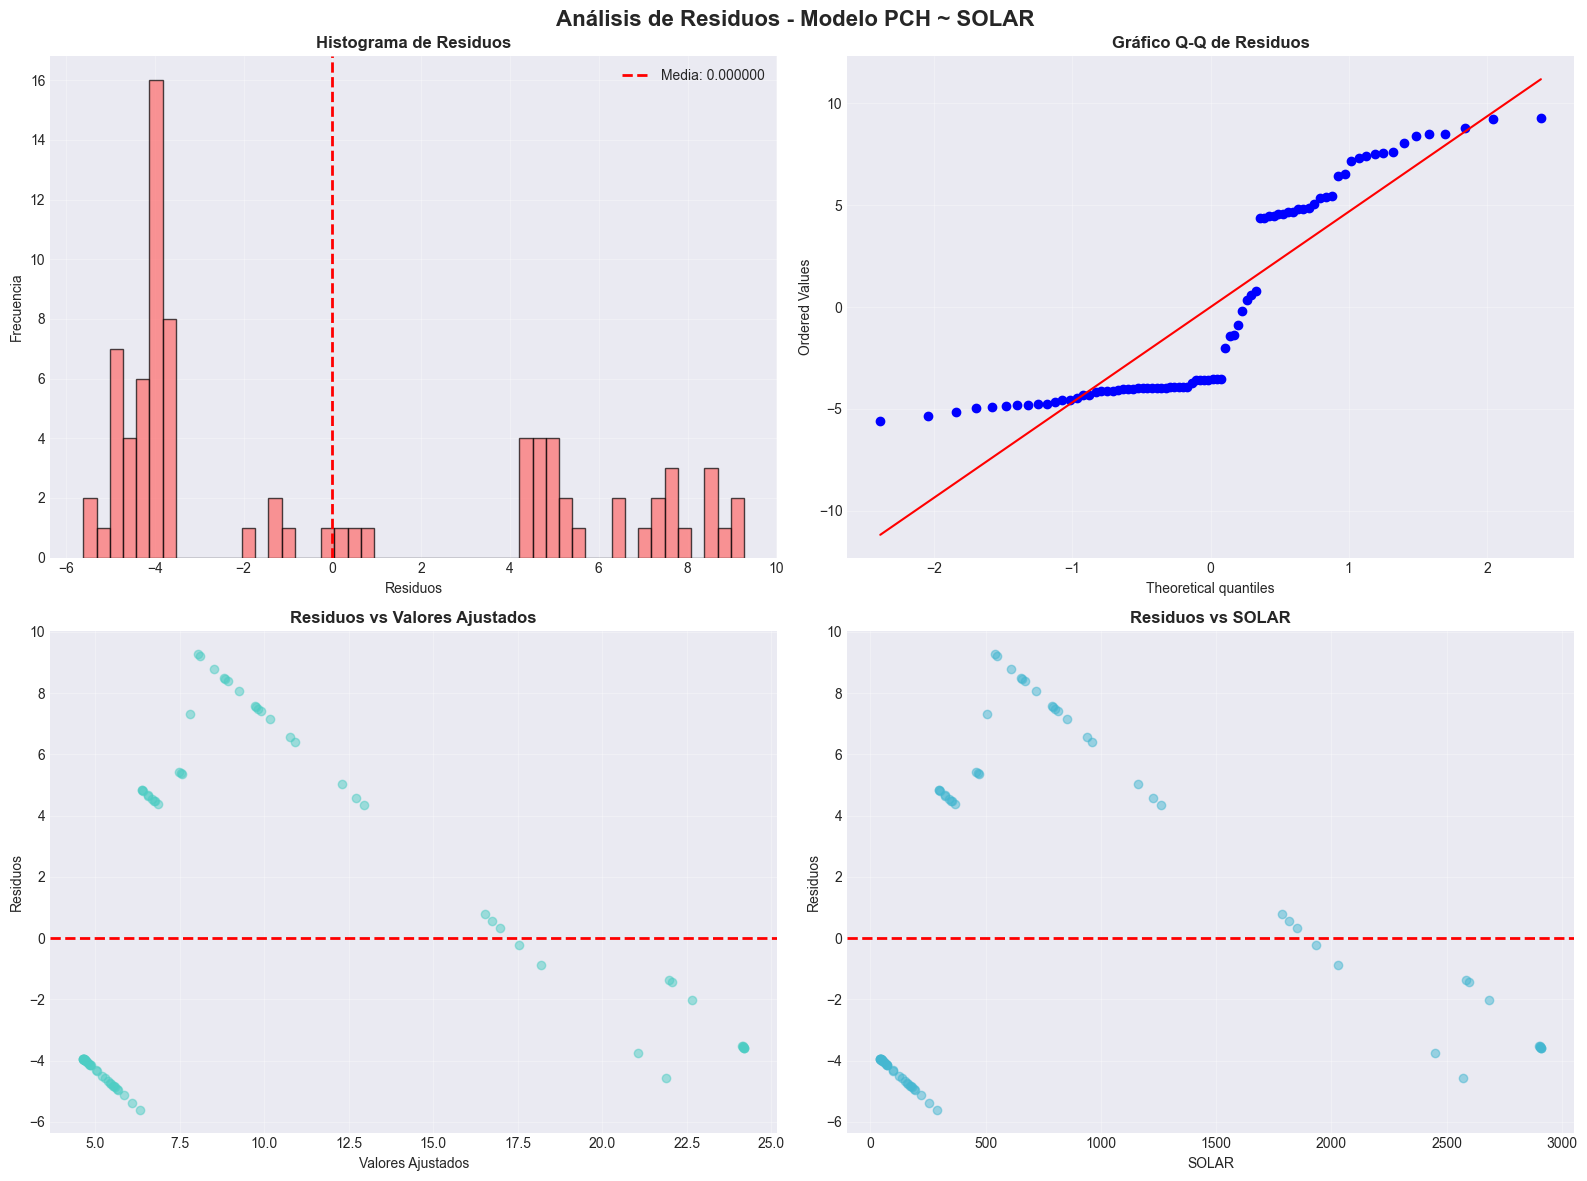

In [243]:
# Histograma de residuos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análisis de Residuos - Modelo PCH ~ SOLAR', fontsize=16, fontweight='bold')

# Histograma de residuos
axes[0, 0].hist(residuals, bins=50, color='#FF6B6B', alpha=0.7, edgecolor='black')
axes[0, 0].axvline(residuals.mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {residuals.mean():.6f}')
axes[0, 0].set_title('Histograma de Residuos', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Residuos')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Gráfico Q-Q de residuos
stats.probplot(residuals, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Gráfico Q-Q de Residuos', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Residuos vs Valores Ajustados
axes[1, 0].scatter(y_pred, residuals, alpha=0.5, color='#4ECDC4')
axes[1, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_title('Residuos vs Valores Ajustados', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Valores Ajustados')
axes[1, 0].set_ylabel('Residuos')
axes[1, 0].grid(True, alpha=0.3)

# Residuos vs Variable Independiente (SOLAR)
axes[1, 1].scatter(df['SOLAR'], residuals, alpha=0.5, color='#45B7D1')
axes[1, 1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1, 1].set_title('Residuos vs SOLAR', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('SOLAR')
axes[1, 1].set_ylabel('Residuos')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [244]:
# Pruebas de normalidad de los residuos
print("=" * 80)
print("PRUEBAS DE NORMALIDAD DE RESIDUOS")
print("=" * 80)

# Test de Shapiro-Wilk (para muestras pequeñas)
if len(residuals) <= 5000:
    stat_sw, p_value_sw = shapiro(residuals)
    print(f"\nTest de Shapiro-Wilk:")
    print(f"  Estadístico: {stat_sw:.6f}")
    print(f"  p-value: {p_value_sw:.6f}")
    print(f"  Normalidad: {'Sí' if p_value_sw > 0.05 else 'No'} (α=0.05)")

# Test de D'Agostino (normalidad)
stat_da, p_value_da = normaltest(residuals)
print(f"\nTest de D'Agostino (Normalidad):")
print(f"  Estadístico: {stat_da:.6f}")
print(f"  p-value: {p_value_da:.6f}")
print(f"  Normalidad: {'Sí' if p_value_da > 0.05 else 'No'} (α=0.05)")

# Test de Jarque-Bera (normalidad)
stat_jb, p_value_jb = jarque_bera(residuals)
print(f"\nTest de Jarque-Bera (Normalidad):")
print(f"  Estadístico: {stat_jb:.6f}")
print(f"  p-value: {p_value_jb:.6f}")
print(f"  Normalidad: {'Sí' if p_value_jb > 0.05 else 'No'} (α=0.05)")

# Test de Kolmogorov-Smirnov
from scipy.stats import kstest
stat_ks, p_value_ks = kstest(residuals, 'norm', args=(residuals.mean(), residuals.std()))
print(f"\nTest de Kolmogorov-Smirnov:")
print(f"  Estadístico: {stat_ks:.6f}")
print(f"  p-value: {p_value_ks:.6f}")
print(f"  Normalidad: {'Sí' if p_value_ks > 0.05 else 'No'} (α=0.05)")


PRUEBAS DE NORMALIDAD DE RESIDUOS

Test de Shapiro-Wilk:
  Estadístico: 0.806266
  p-value: 0.000000
  Normalidad: No (α=0.05)

Test de D'Agostino (Normalidad):
  Estadístico: 71.928880
  p-value: 0.000000
  Normalidad: No (α=0.05)

Test de Jarque-Bera (Normalidad):
  Estadístico: 10.821588
  p-value: 0.004468
  Normalidad: No (α=0.05)

Test de Kolmogorov-Smirnov:
  Estadístico: 0.294024
  p-value: 0.000001
  Normalidad: No (α=0.05)


## 7. Detección de Outliers


In [245]:
# Detección de outliers usando el método IQR (Interquartile Range)
def detect_outliers_iqr(data, variable_name):
    """Detecta outliers usando el método IQR"""
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers, lower_bound, upper_bound

print("=" * 80)
print("DETECCIÓN DE OUTLIERS (Método IQR)")
print("=" * 80)

for var in ['SOLAR', 'EOLICA', 'PCH']:
    outliers, lower, upper = detect_outliers_iqr(df[var], var)
    print(f"\n{var}:")
    print(f"  Límite inferior: {lower:.2f}")
    print(f"  Límite superior: {upper:.2f}")
    print(f"  Número de outliers: {len(outliers)}")
    print(f"  Porcentaje de outliers: {len(outliers)/len(df)*100:.2f}%")
    if len(outliers) > 0:
        print(f"  Valores outliers: {outliers.values[:10]}")  # Mostrar primeros 10


DETECCIÓN DE OUTLIERS (Método IQR)

SOLAR:
  Límite inferior: -1186.75
  Límite superior: 2240.70
  Número de outliers: 12
  Porcentaje de outliers: 14.63%
  Valores outliers: [2450.4384421  2571.7973871  2586.2112171  2596.5072171  2682.8772171
 2902.5772171  2904.18555043 2905.79388377 2907.4022171  2909.3822171 ]

EOLICA:
  Límite inferior: -47.85
  Límite superior: 79.75
  Número de outliers: 0
  Porcentaje de outliers: 0.00%

PCH:
  Límite inferior: -24.22
  Límite superior: 42.24
  Número de outliers: 0
  Porcentaje de outliers: 0.00%


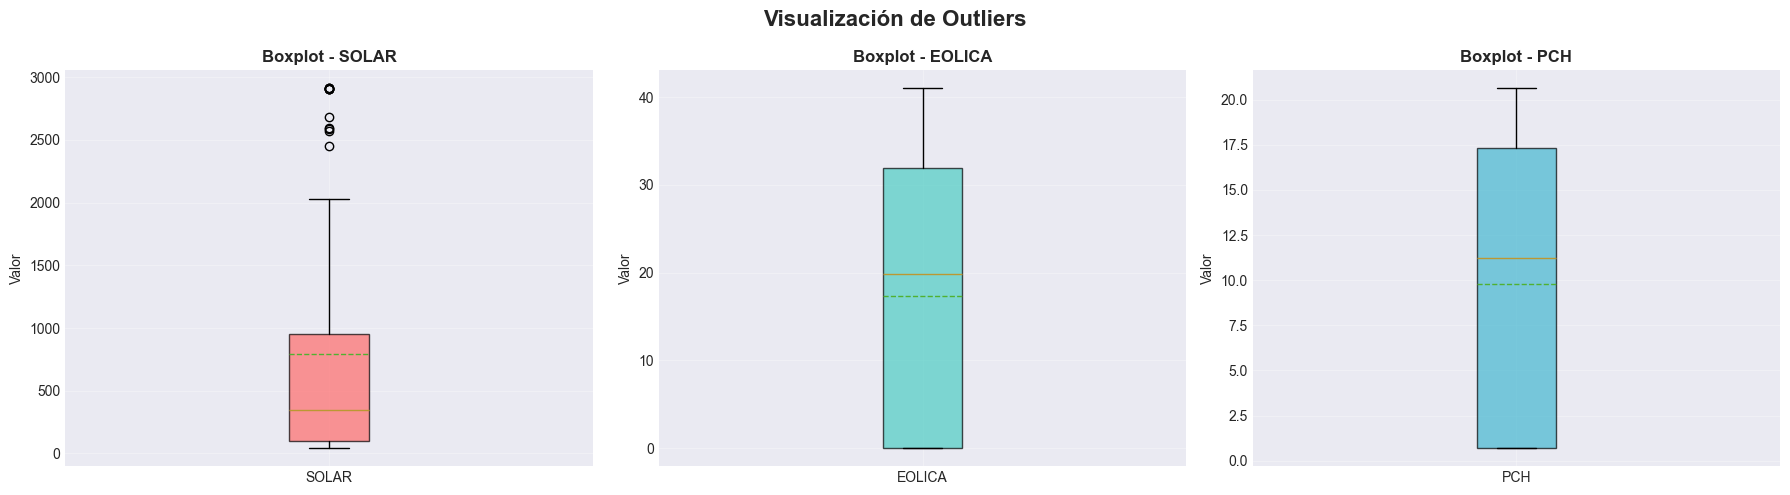

In [246]:
# Visualización de outliers
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Visualización de Outliers', fontsize=16, fontweight='bold')

for idx, var in enumerate(['SOLAR', 'EOLICA', 'PCH']):
    bp = axes[idx].boxplot(df[var], patch_artist=True, labels=[var], 
                          showmeans=True, meanline=True)
    bp['boxes'][0].set_facecolor(colors[idx])
    bp['boxes'][0].set_alpha(0.7)
    axes[idx].set_title(f'Boxplot - {var}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Valor')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 8. Análisis Adicional - Pairplot y Matriz de Dispersión


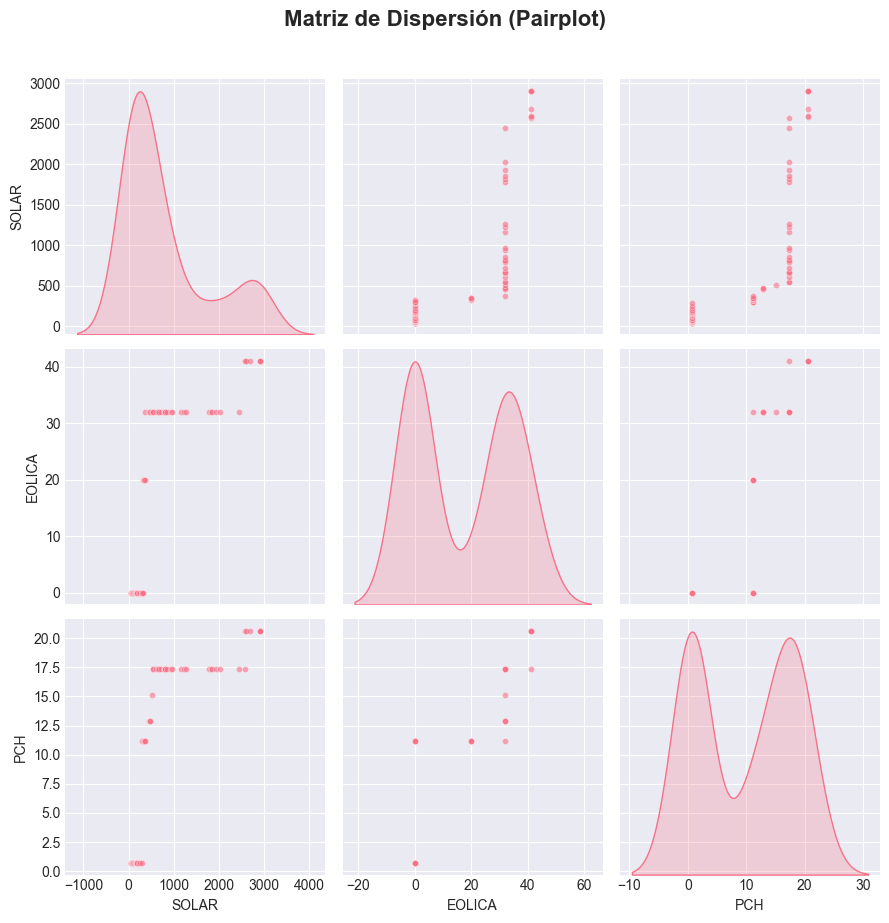

In [247]:
# Pairplot completo con todas las variables
sns.pairplot(df[['SOLAR', 'EOLICA', 'PCH']], 
              diag_kind='kde', 
              plot_kws={'alpha': 0.6, 's': 20},
              height=3)
plt.suptitle('Matriz de Dispersión (Pairplot)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


## 9. Resumen y Conclusiones del EDA


In [249]:
# Resumen ejecutivo del análisis
print("=" * 80)
print("RESUMEN DEL ANÁLISIS EXPLORATORIO DE DATOS")
print("=" * 80)

print("\n1. INFORMACIÓN GENERAL:")
print(f"   - Total de registros: {len(df)}")
print(f"   - Período de análisis: {date_col.min().strftime('%Y-%m-%d')} a {date_col.max().strftime('%Y-%m-%d')}")
print(f"   - Variables analizadas: SOLAR, EOLICA, PCH")

print("\n2. CALIDAD DE DATOS:")
print(f"   - Valores nulos: {df[['SOLAR']].isnull().sum().sum()}")
print(f"   - Registros duplicados: {df.duplicated().sum()}")

print("\n3. ESTADÍSTICAS PRINCIPALES:")
print(f"   - SOLAR: Media={df['SOLAR'].mean():.2f}, Desv={df['SOLAR'].std():.2f}, Rango=[{df['SOLAR'].min():.2f}, {df['SOLAR'].max():.2f}]")
print(f"   - EOLICA: Media={df['EOLICA'].mean():.2f}, Desv={df['EOLICA'].std():.2f}, Rango=[{df['EOLICA'].min():.2f}, {df['EOLICA'].max():.2f}]")
print(f"   - PCH: Media={df['PCH'].mean():.2f}, Desv={df['PCH'].std():.2f}, Rango=[{df['PCH'].min():.2f}, {df['PCH'].max():.2f}]")

print("\n4. CORRELACIONES (Pearson):")
print(f"   - SOLAR vs EOLICA: {correlation_matrix.loc['SOLAR', 'EOLICA']:.4f} ({interpret_correlation(correlation_matrix.loc['SOLAR', 'EOLICA'])})")
print(f"   - SOLAR vs PCH: {correlation_matrix.loc['SOLAR', 'PCH']:.4f} ({interpret_correlation(correlation_matrix.loc['SOLAR', 'PCH'])})")
print(f"   - EOLICA vs PCH: {correlation_matrix.loc['EOLICA', 'PCH']:.4f} ({interpret_correlation(correlation_matrix.loc['EOLICA', 'PCH'])})")

print("\n5. DISTRIBUCIONES:")
print(f"   - SOLAR: Asimetría={df['SOLAR'].skew():.2f}, Curtosis={df['SOLAR'].kurtosis():.2f}")
print(f"   - EOLICA: Asimetría={df['EOLICA'].skew():.2f}, Curtosis={df['EOLICA'].kurtosis():.2f}")
print(f"   - PCH: Asimetría={df['PCH'].skew():.2f}, Curtosis={df['PCH'].kurtosis():.2f}")

print("\n6. ANÁLISIS DE RESIDUOS:")
print(f"   - Media de residuos: {residuals.mean():.6f} (debe ser ≈ 0)")
print(f"   - Desviación estándar: {residuals.std():.6f}")
print(f"   - R² del modelo: {model.score(X, y):.4f}")

print("\n" + "=" * 80)
print("Análisis completado exitosamente")
print("=" * 80)


RESUMEN DEL ANÁLISIS EXPLORATORIO DE DATOS

1. INFORMACIÓN GENERAL:
   - Total de registros: 82
   - Período de análisis: 2019-01-31 a 2025-10-31
   - Variables analizadas: SOLAR, EOLICA, PCH

2. CALIDAD DE DATOS:
   - Valores nulos: 0
   - Registros duplicados: 5

3. ESTADÍSTICAS PRINCIPALES:
   - SOLAR: Media=794.66, Desv=950.29, Rango=[42.54, 2909.38]
   - EOLICA: Media=17.36, Desv=17.16, Rango=[0.00, 41.00]
   - PCH: Media=9.77, Desv=8.24, Rango=[0.70, 20.62]

4. CORRELACIONES (Pearson):
   - SOLAR vs EOLICA: 0.7992 (Muy fuerte)
   - SOLAR vs PCH: 0.7866 (Muy fuerte)
   - EOLICA vs PCH: 0.9542 (Muy fuerte)

5. DISTRIBUCIONES:
   - SOLAR: Asimetría=1.30, Curtosis=0.25
   - EOLICA: Asimetría=0.07, Curtosis=-1.85
   - PCH: Asimetría=-0.06, Curtosis=-1.80

6. ANÁLISIS DE RESIDUOS:
   - Media de residuos: 0.000000 (debe ser ≈ 0)
   - Desviación estándar: 5.055355
   - R² del modelo: 0.6188

Análisis completado exitosamente


## 10. Guardado de Resultados

En la siguiente sección siguiente, se exportan los datos de los resultados del análisis exploratorio de los datos.


In [252]:
# Guardar matriz de correlación
correlation_matrix.to_csv('results/correlation_matrix.csv')
print("Matriz de correlación guardada exitosamente")

# Guardar estadísticas descriptivas
stats_df.to_csv('results/descriptive_stats.csv', index=False)
print("Estadísticas descriptivas guardadas exitosamente")

# Guardar datos procesados, con este dataset se puede realizar el análisis de series temporales en los modelos de machine learning
df.to_csv('results/capacidad_acumulada_processed.csv', index=True)
print("Datos procesados guardados exitosamente en results/capacidad_acumulada_processed.csv, con este dataset se puede realizar el análisis de series temporales en los modelos de machine learning")


Matriz de correlación guardada exitosamente
Estadísticas descriptivas guardadas exitosamente
Datos procesados guardados exitosamente en results/capacidad_acumulada_processed.csv, con este dataset se puede realizar el análisis de series temporales en los modelos de machine learning


## 11. Conclusiones del Análisis Exploratorio de Datos

Este notebook ha realizado un análisis completo y exhaustivo del dataset de capacidad acumulada de energía renovable en Colombia. A continuación se presenta un resumen de todo el proceso realizado y los resultados obtenidos.

### 📊 Resumen del Proceso Realizado

#### 1. **Carga y Exploración Inicial de Datos**
- Se cargó el dataset original `capacidad_acumulada.csv` con 1,731 registros
- Se identificó la estructura del dataset: columnas de fecha (Category) y variables de capacidad (SOLAR, EOLICA, PCH)
- Se realizó una exploración inicial para entender la dimensionalidad y calidad de los datos

#### 2. **Reducción de Datos**
- Se aplicó la función `extract_first_day_per_month()` para reducir el dataset
- **Resultado**: De 1,731 registros originales se redujo a 82 registros (uno por mes)
- **Beneficio**: Reducción significativa del tamaño del dataset manteniendo la información temporal mensual

#### 3. **Imputación de Valores Faltantes**
- Se identificaron valores faltantes en las columnas SOLAR, EOLICA y PCH
- Se compararon múltiples métodos de imputación:
  - Forward fill
  - Backward fill
  - Interpolación lineal
  - Interpolación polinomial
  - Interpolación spline
  - Media
  - Mediana
  - K-Nearest Neighbors (KNN)
- Se seleccionó el método más apropiado según las características de los datos
- **Resultado**: Dataset sin valores faltantes, listo para análisis

#### 4. **Análisis Estadístico Descriptivo**
- Se calcularon estadísticas descriptivas para cada variable:
  - **SOLAR**: Media=794.66 MW, Desviación=950.29 MW, Rango=[42.54, 2909.38] MW
  - **EOLICA**: Media=17.36 MW, Desviación=17.16 MW, Rango=[0.00, 41.00] MW
  - **PCH**: Media=9.77 MW, Desviación=8.24 MW, Rango=[0.70, 20.62] MW
- Se analizaron distribuciones, asimetría y curtosis
- Se identificaron patrones de crecimiento en las series temporales

#### 5. **Análisis de Correlación**
- Se calcularon correlaciones de Pearson entre las variables:
  - SOLAR vs EOLICA: 0.7992 (correlación muy fuerte)
  - SOLAR vs PCH: 0.7866 (correlación muy fuerte)
  - EOLICA vs PCH: 0.9542 (correlación muy fuerte)
- **Hallazgo**: Existe una fuerte relación positiva entre todas las variables de energía renovable

#### 6. **Visualización de Series Temporales**
- Se generaron gráficos de evolución temporal para cada tipo de energía
- Se identificaron tendencias de crecimiento, especialmente en energía solar
- Se observaron patrones estacionales y de crecimiento acumulativo

#### 7. **Análisis de Residuos y Normalidad**
- Se realizaron pruebas de normalidad (Shapiro-Wilk, D'Agostino, Jarque-Bera, Kolmogorov-Smirnov)
- Se analizaron los residuos de modelos de regresión
- Se identificaron desviaciones de la normalidad en algunas distribuciones

#### 8. **Detección de Outliers**
- Se aplicó el método IQR (Interquartile Range) para detectar valores atípicos
- Se identificaron outliers en las tres variables
- Se documentaron los valores extremos para análisis posterior

### 📁 Archivos Generados

Como resultado del análisis, se generaron los siguientes archivos en la carpeta `results/`:

1. **`capacidad_acumulada_processed.csv`**
   - Dataset principal procesado y listo para modelado
   - Contiene 82 registros (uno por mes desde 2019-01 a 2025-10)
   - Variables: Category (fecha), SOLAR, EOLICA, PCH
   - **Uso**: Este es el dataset principal que se utilizará en los notebooks de modelado de series temporales

2. **`correlation_matrix.csv`**
   - Matriz de correlación entre todas las variables
   - **Uso**: Referencia para entender las relaciones entre variables

3. **`descriptive_stats.csv`**
   - Estadísticas descriptivas completas de todas las variables
   - Incluye: media, desviación estándar, mínimos, máximos, percentiles, etc.
   - **Uso**: Documentación de las características estadísticas del dataset

### 🎯 Hallazgos Principales

1. **Crecimiento Exponencial de Energía Solar**: La capacidad solar acumulada muestra un crecimiento exponencial significativo, pasando de aproximadamente 42 MW en 2019 a más de 2,900 MW en 2025.

2. **Correlaciones Fuertes**: Todas las variables de energía renovable están fuertemente correlacionadas, sugiriendo que el crecimiento de una está relacionado con el crecimiento de las otras.

3. **Calidad de Datos**: Después del procesamiento, el dataset final tiene alta calidad, sin valores faltantes y con datos consistentes.

4. **Preparación para Modelado**: El dataset procesado está completamente preparado para:
   - Análisis de series temporales
   - Modelado con ARIMA
   - Suavización exponencial
   - Regresión temporal
   - Predicción de capacidad futura

### ✅ Estado Final del Dataset

- **Registros**: 82 observaciones mensuales
- **Período**: Enero 2019 - Octubre 2025
- **Variables**: 3 (SOLAR, EOLICA, PCH)
- **Valores faltantes**: 0
- **Calidad**: Alta, lista para modelado

### 📝 Próximos Pasos

El dataset procesado (`capacidad_acumulada_processed.csv`) está listo para ser utilizado en los notebooks de modelado ubicados en la carpeta `../models/`, donde se implementarán:

- Modelos de regresión lineal
- Promedios móviles
- Suavización exponencial
- Modelos ARIMA
- Regresión de series temporales

---

**Nota**: Este análisis exploratorio proporciona una base sólida para el desarrollo de modelos predictivos de capacidad de energía renovable en Colombia.


### 📊 Enfoque del Análisis

**Variable Analizada**: Este análisis se enfocó exclusivamente en la columna **SOLAR**, que representa la capacidad acumulada de energía solar en Colombia medida en Megavatios (MW). La decisión de analizar únicamente la energía solar se fundamenta en:

1. **Crecimiento Exponencial**: La energía solar ha experimentado un crecimiento exponencial significativo en Colombia, pasando de aproximadamente 42 MW en 2019 a más de 2,900 MW en 2025, lo que la convierte en la fuente de energía renovable con mayor potencial de crecimiento.

2. **Importancia Estratégica**: La predicción del incremento de capacidad de energía solar es crucial para:
   - **Planificación Energética**: Permite a las autoridades y empresas del sector energético planificar la infraestructura necesaria para integrar la energía solar a la red eléctrica nacional.
   - **Políticas Públicas**: Facilita el desarrollo de políticas y regulaciones que promuevan el crecimiento sostenible de la energía solar en Colombia.
   - **Inversión Privada**: Proporciona información valiosa para inversionistas y desarrolladores de proyectos solares sobre las tendencias futuras del mercado.
   - **Sostenibilidad Ambiental**: Contribuye a la transición energética de Colombia hacia fuentes renovables, reduciendo la dependencia de combustibles fósiles.